# Roche potential contour plots.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(["default"])
plt.rcParams["text.usetex"] = True

## Defining the dimensionless potential $\Phi$.

We choose a corotating coordinate system that follows the rotation of two stars about their center of mass, which lies at the origin. The effective gravitational potential $\Phi$ will consist of a gravitation potential and a centrifugal potential term, so that,
$$\Phi=-G\left(\frac{M_{1}}{s_{1}}+\frac{M_{2}}{s_{2}}\right)-\frac{1}{2}\omega^{2}r^{2},$$
where $M_{1}$ and $M_{2}$ are the masses of the primary and secondary star, respectively, while $s_{1}$ and $s_{2}$ are the respective distances to a test mass $m$. Describing the centrifugal potential, the term $\omega$ is the system's angular velocity and $r$ is the distance between the center of mass and the test mass $m$.

The primary star can be set at the origin, so that,
$$s_{1}=\left(x^{2}+y^{2}\right)^{\frac{1}{2}},$$
$$s_{2}=\left[(x-\alpha)^{2}+y^{2}\right]^{\frac{1}{2}},$$
where $\alpha$ is the orbital separation between the two stars. The position of the center of mass $x_{c}$ will, then, be given by,
$$x_{c}=\frac{M_{2}}{M_{1}+M_{2}}\alpha=\frac{q}{1+q}\alpha,$$
where we have replaced the mass ratio with $q$, so that,
$$q=\frac{M_{2}}{M_{1}}$$

Kepler's third law must also apply,
$$\omega^{2}=\frac{G\left(M_{1}+M_{2}\right)}{\alpha^{3}}$$

Using Kepler's law, the definition of the potential $\Phi$ can be altered, so as to receive its dimensionless counterpart,
$$\Phi^{dl}\left(x',y'\right)=\frac{2}{1+q}\frac{1}{\left[x'^{2}+y'^{2} \right]^{\frac{1}{2}}}+\frac{2q}{1+q}\frac{1}{\left[\left(x'-1\right)^{2}+y'^{2} \right]^{\frac{1}{2}}}+\left(x'-\frac{q}{1+q}\right)^{2}+y'^{2},$$
which satisfies the equation,
$$\Phi=-\frac{G}{2\alpha}\Phi^{dl},$$
where $M=M_{1}+M_{2}$ is the system's total mass. The primed coefficients denote division with $\alpha$, so as to attain dimensionless quantities.

## Normalised lagrange points $L_{i}'$.

### Presenting the equations.

We seek numerical solutions for the $x'$ values of the lagrange points $L_{1}',L_{2}',L_{3}'$, which have been normalised with respect to orbital separation. The final form of the dimensionless roche potential is  given by,
$$\Phi^{dl}\left(x',y'\right)=\frac{2}{1+q}\frac{1}{\left[x'^{2}+y'^{2} \right]^{\frac{1}{2}}}+\frac{2q}{1+q}\frac{1}{\left[\left(x'-1\right)^{2}+y'^{2} \right]^{\frac{1}{2}}}+\left(x'-\frac{q}{1+q}\right)^{2}+y'^{2}$$

Due to the symmetry of the problem, we know that the $y'$ values for the first three lagrange points are set to $0$, so the problem reduces to finding the roots of the equation,
$$\frac{d\Phi^{dl}}{dx'}\bigg|_{(y=0)}=0,$$
which, at first, can be analytically written as,
$$\frac{2}{1+q}\frac{1}{|x'|}+\frac{2q}{1+q}\frac{1}{|x'-1|}+\left(x'-\frac{q}{1+q} \right)^{2}=0$$

The left hand side is a piecewise function and, thus, leads to three different equations depending on the region we choose for $x'$.

$i)$ For $x'>1$ we finally get:

$$x'^{5}-\frac{2+3q}{1+q}x'^{4}+\frac{1+3q}{1+q}x'^{3}-\frac{1+2q}{1+q}x'^{2}+\frac{2}{1+q}x'-\frac{1}{1+q}=0$$

and it is at this region that we expect to get the Lagrange point $L'_{2}$.

$ii)$ For $x\in (0, 1)$ we get:

$$x'^{5}-\frac{2+3q}{1+q}x'^{4}+\frac{1+3q}{1+q}x'^{3}-\frac{1}{1+q}x'^{2}+\frac{2}{1+q}x'-\frac{1}{1+q}=0,$$

where we expect to get the Lagrange point $L_{1}'$.

$iii)$ For $x'<0$ we get:

$$x'^{5}-\frac{2+3q}{1+q}x'^{4}+\frac{1+3q}{1+q}x'^{3}+\frac{1}{1+q}x'^{2}-\frac{2}{1+q}x'+\frac{1}{1+q}=0,$$

where we expect to get the $L_{3}'$ Lagrange point.

### Numerical method.

In order to solve these polynomial equations, we use the Newton - Raphson method. Assuming we want to solve a non - linear equation of the form,
$$f(x)=0,$$
the recurrence relation is given by,
$$x_{n+1}=x_{n}-\frac{f(x_{n})}{f'(x_{n})},$$
while the error follows the relation,
$$\epsilon_{n+1}=-\frac{f''(\rho)}{f'(\rho)}\epsilon_{n}^{2}.$$

In [2]:
# Lagrange Point L1:

def L1_point(q):
    a = - (2 + 3*q) / (1 + q) ; b = (1 + 3*q) / (1 + q) ; c = - 1 / (1 + q) ; d = 2 / (1 + q) ; e = - 1 / (1 + q)
    def f(x): return x**5 + a*x**4 + b*x**3 + c*x**2 + d*x + e
    def Df(x): return 5*x**4 + 4*a*x**3 + 3*b*x**2 + 2*c*x + d
    
    x = 0.9
    solution = []
    
    for i in range(1000):
        x = x - f(x) / Df(x)
        solution.append(x)
        
        if i > 1 and np.abs(solution[i] - solution[i-1]) < 10**(-12):
            L1X = solution[i]
            break
    
    return [L1X, 0]

In [3]:
# Lagrange Point L2:

def L2_point(q):
    a = - (2 + 3*q) / (1 + q) ; b = (1 + 3*q) / (1 + q) ; c = - (1  + 2*q) / (1 + q) ; d = 2 / (1 + q) ; e = - 1 / (1 + q)
    def f(x): return x**5 + a*x**4 + b*x**3 + c*x**2 + d*x + e
    def Df(x): return 5*x**4 + 4*a*x**3 + 3*b*x**2 + 2*c*x + d
    
    x = 1.2
    solution = []
    
    for i in range(1000):
        x = x - f(x) / Df(x)
        solution.append(x)
        
        if i > 1 and np.abs(solution[i] - solution[i-1]) < 10**(-12):
            L2X = solution[i]
            break
    
    return [L2X, 0]

In [4]:
# Lagrange Point L3:

def L3_point(q):
    a = - (2 + 3*q) / (1 + q) ; b = (1 + 3*q) / (1 + q) ; c = 1 / (1 + q) ; d = - 2 / (1 + q) ; e = 1 / (1 + q)
    def f(x): return x**5 + a*x**4 + b*x**3 + c*x**2 + d*x + e
    def Df(x): return 5*x**4 + 4*a*x**3 + 3*b*x**2 + 2*c*x + d
    
    x = -0.2
    solution = []
    
    for i in range(1000):
        x = x - f(x) / Df(x)
        solution.append(x)
        
        if i > 1 and np.abs(solution[i] - solution[i-1]) < 10**(-12):
            L3X = solution[i]
            break
    
    return [L3X, 0]

### Calculating the vertical size of a roche lobe.

Once we have the value of the roche potential that corresponds to the roche lobe, we wish to solve the equations,
$$\Phi^{dl}(0,y')=\Phi^{dl}(L_{1}'(x')),$$
$$\Phi^{dl}(1,y')=\Phi^{dl}(L_{1}'(x')),$$
so as to get a qualitative result for the vertical size of each lobe. 

The position $x'=0$ corresponds to the primary star which lies on the origin of the axes, while the position $x'=1$ corresponds to the secondary star.

The equations that arise, assuming positive values for $y'$, are,
$$f(y')=\left[2+\left(\frac{q^{2}}{1+q}-(1+q)\Phi^{dl}(L_{1}')\right)y'+(1+q)y'^{3}\right]^{2}\left(1+y'^{2}\right)-4q^{2}y'^{2}=0,$$
for $x'=0$. 

The derivative that is used for the Newton - Raphson method is,
$$f'(y')=2\left[\left(\frac{q^{2}}{1+q}-(1+q)\Phi^{dl}(L_{1}')+3(1+q)y'^{2}\right)\right]\left[2+\left(\frac{q^{2}}{1+q}-(1+q)\Phi^{dl}(L_{1}')\right)y'+(1+q)y'^{3}\right](1+y'^{2})+2\left[2+\left(\frac{q^{2}}{1+q}-(1+q)\Phi^{dl}(L_{1}')\right)y'+(1+q)y'^{3}\right]^{2}y'-8q^{2}y',$$

and
$$f(y')=\left[2q+(1+q)\left(\left(1-\frac{q}{1+q}\right)^{2}-\Phi^{dl}(L_{1}')\right)y'+(1+q)y'^{3}\right]^{2}(1+y'^{2})-4y'^{2}=0,$$
for $x'=1$. 

The derivative that is used for the Newton - Raphson method is,
$$f'(y')=2\left[(1+q)\left(\left(1-\frac{q}{1+q}\right)^{2}-\Phi^{dl}(L_{1}')\right)+3(1+q)y'^{2}\right]\left[2q+(1+q)\left(\left(1-\frac{q}{1+q}\right)^{2}-\Phi^{dl}(L_{1}')\right)y'+(1+q)y'^{3}\right](1+y'^{2})+2\left[2q+(1+q)\left(\left(1-\frac{q}{1+q}\right)^{2}-\Phi^{dl}(L_{1}')\right)y'+(1+q)y'^{3}\right]^{2}y'-8y'$$

In [5]:
# Defining the dimensionless potential.

def phi_dl(x, y, q):
    s1 = np.sqrt(x**2 + y**2)
    s2 = np.sqrt((x-1)**2 + y**2)
    return (2 / (1+q))*(1 / s1) + (2*q / (1+q))*(1 / s2) + (x - q/(1+q))**2 + y**2

In [6]:
# y value at x' = 0.

def y1(q):
    phi_dl_L1X = phi_dl(L1_point(q)[0], L1_point(q)[1], q)
    c0 = 2; c1 = (q**2 / (1+q) - (1+q)*phi_dl_L1X); c3 = 1 + q 
    
    def f(y):
        return (c0 + c1*y + c3*y**3)**2 * (1+y**2) - 4*(q**2)*(y**2)
    def Df(y):
        return 2 * (c1 + 3*c3*y**2) * (c0 + c1*y + c3*y**3) * (1 + y**2) + 2 * (c0 + c1*y + c3*y**2)**2 * y - 8*(q**2)*y
    
    y = 0.9
    solution = []
    
    for i in range(1000):
        y = y - f(y) / Df(y)
        solution.append(y)
        
        if i > 1 and np.abs(solution[i] - solution[i-1]) < 10**(-12):
            root = solution[i]
            break
            
    return root

In [7]:
# y value at x' = 1.

def y2(q):
    phi_dl_L1X = phi_dl(L1_point(q)[0], L1_point(q)[1], q)
    c0 = 2*q ; c1 = (1+q)*((1-(q/(1+q)))**2-phi_dl_L1X) ; c3 = 1+q
    
    def f(y):
        return (c0 + c1*y + c3*y**3)**2 * (1+y**2) - 4*y**2
    def Df(y):
        return 2*(c1 + 3*c3*y**2)*(c0 + c1*y + c3*y**3) * (1 + y**2) + 2*(c0 + c1*y + c3*y**3)**2 * y - 8*y
    
    y = 0.5
    solution = []
    
    for i in range(1000):
        y = y - f(y) / Df(y)
        solution.append(y)
        
        if i > 1 and np.abs(solution[i] - solution[i-1]) < 10**(-12):
            root = solution[i]
            break
    
    return root

### Test contour plot for $q = 0.2$.

In [8]:
q = 0.2

L1 = phi_dl(L1_point(q)[0], L1_point(q)[1], q)
L2 = phi_dl(L2_point(q)[0], L2_point(q)[1], q)
L3 = phi_dl(L3_point(q)[0], L3_point(q)[1], q)

L4X = (1/2) * ((1-q)/(1+q)) ; L4Y = np.sqrt(3)/2 ; L4 = phi_dl(L4X, L4Y, 0.2)
L5X = (1/2) * ((1-q)/(1+q)) ; L5Y = -np.sqrt(3)/2 ; L5 = phi_dl(L5X, L5Y, 0.2)

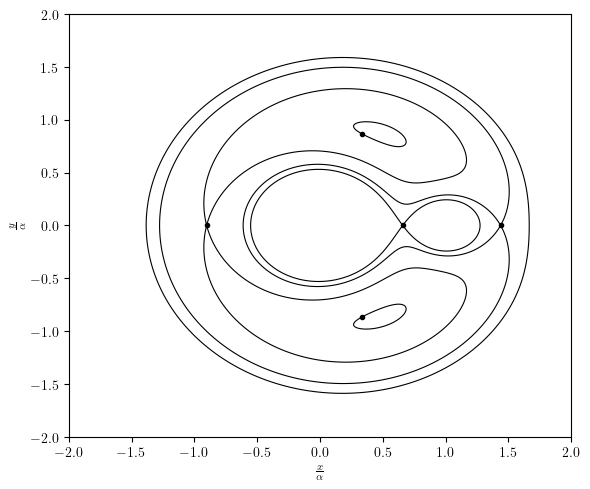

In [12]:
fig, ax = plt.subplots(1, 1, figsize = (6, 5), tight_layout=True)

x = np.linspace(-2, 2, 1000) ; y = np.linspace(-2, 2, 1000)
X, Y = np.meshgrid(x, y)

Lagrange = [L1_point(q), L2_point(q), L3_point(q), [L4X, L4Y], [L5X, L5Y]]

plt.contour(X, Y, phi_dl(X, Y, q), colors="black", levels=[L4, L3, L2, L1])

for i in range(5): plt.plot(Lagrange[i][0], Lagrange[i][1], color="black", marker=".")
ax.set_xlabel(r"$\frac{x}{\alpha}$") ; ax.set_ylabel(r"$\frac{y}{\alpha}$")
plt.rcParams["lines.linewidth"] = 0.8
plt.show()

In [10]:
[L1_point(q)[0], 1 - L1_point(q)[0]]

[0.6585556789537763, 0.3414443210462237]

In [11]:
[y1(q), y2(q)]

[0.5297730024283205, 0.24223968677704738]

## Contour plots for a variety of $q$ - values.